In [1]:
%display typeset

# Introdução à dinâmica contínua de populações
Neste documento vamos introduzir o estudo da dinâmica de populações.
## Modelos de uma única espécie

Em modelagem da dinâmica de uma população, estamos preocupados com as varições do número de indivíduos ao longo do tempo, que produz a sua dinâmica. Este número só pode mudar em decorrência de uma das causas abaixo:

    Nascimentos
    Mortes
    Imigração 
    Emigração

Por conseguinte, dado um pequeno intervalo de tempo $\Delta t$, Esta alteração no número de indivíduos, $\Delta N$, sempre pode ser escrita da seguinte forma:

$$\Delta N = (B - D + I - E)\Delta t$$

onde $B \Delta t$, $D \Delta t$, $I \Delta t$ e $E \Delta t$ correspondem ao número total de nascimentos, mortes, individuos entrando e indivíduos saindo da população no interval $\Delta t$. A forma funcional de cada um destes elementos deve ser definida pelo modelador em função da população que se deseja modelar.

Equações como a descrita anteriormente, são conhecidas com equações de diferença, e são mais adequadas adequadas quando a população de interesse apresenta um tempo geracional bem definido sem sobreposição de gerações. Quando este pressuposto não é válido, podemos tornar $\Delta t$ bem pequeno, desta forma aproximando as variações da população por uma função contínua $N(t)$. Então obtemos uma equação diferencial como esta:

$$\frac{dN}{dt}= B(N) - D(N)$$

Vamos agora explorar alguns modelos populacionais simples  para nos acostumarmos com a sua representação
## Modelo Malthusiano

em 1798 Thomas Malthus, provavelment basado em um modelo como o que examinaremos agora, [vaticinou](http://en.wikipedia.org/wiki/An_Essay_on_the_Principle_of_Population) que a menos que a a taxa de nanatlidade da população humana fosse controlada evoluiríamos para uma situação em que não haveria mais comida para alimentar a todos, e o controle populacional seria alcançado através da fome e doenças.

In [2]:
var('t')
N = function('N')(t)
diffeq = diff(N, t) == 0.3*N
sol = desolve(diffeq, N, [0,10])
sol

10*e^(3/10*t)

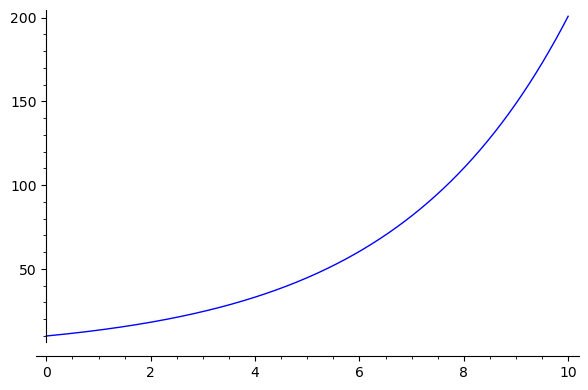

In [3]:
plot(sol, (t, 0, 10))


## Crescimento dependente da densidade

Como Malthus temia, vamos a população vai crescer exponencialmente e não haverá comida para todos. Mas se a população realmente crescer desta maneira, os indivíduos certamente competirão por recursos, pois estes são limitados (finitos).

Podemos então imaginar que, nessa situação apocalíptica, toda porção de comida será disputada com necessáriamente um perdedor que ficará sem comer. Desta forma podemos adicionar um termo de mortalidade proporcional à taxa de encontro entre os indivíduos:

$$\frac{dN}{dt}= 0.3N - 0.1\frac{N*N}{2}$$


In [4]:
var('t')
N=function('N')(t)
diffeq = diff(N, t) == 0.3*N - 0.01*N*N/2
sol = desolve(diffeq,N, [0,40])
show(solve(sol,N)[0])
pretty_print(html(r"Podemos encontrar os equilíbrios deste modelo de crescimento ($\frac{dN}{dt}=0$)"))
solve(0.3*N - 0.01*N*N/2, N)

log(N(t)) == -I*pi + 3/10*t + log(40) - log(20) + log(N(t) - 60)

Podemos encontrar os equilíbrios deste modelo de crescimento (<script type="math/tex">\frac{dN}{dt}=0</script>)

[N(t) == 0, N(t) == 60]

Neste caso a solução converge para uma população de 60 indivídues. Podemos inspecionar a dinâmica por meio de integração numérica.

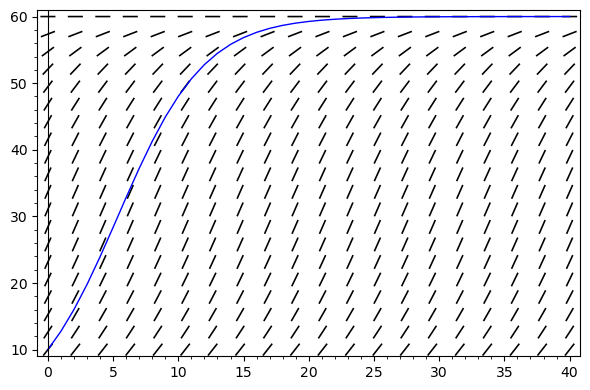

In [5]:
desolve_rk4(diffeq,N, ics=[0,10],step=1, end_points=40, output='slope_field')



Como podemos ver, a competição desacelera o crescimento da população devido à mortalidade gerada pela escassez de recursos. Dada esta observação, uma outra forma de obtermos o mesmo resultado é imaginndo que o ambiente consegue suportar um número máximo de indivíduos (digamos: 60), devido a limitação dos recursos, e introduzir este limite explícitamente no modelo:

$$\frac{dN}{dt}=0.3N*(1-\frac{N}{60})$$

Assim não temos mais uma mortalidade explícita, mas uma desaceleração gradual da taxa de crescimento à medida em que $N$ se aproxima de $60$. A esta dinâmica chamamos **crescimento logístico**.


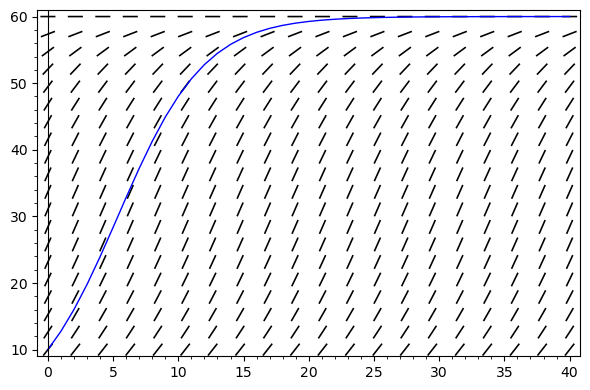

In [6]:
var('r K t')
diffeq2 = diff(N, t) == r*N*(1-N/K)
desolve_rk4(diffeq2(r=0.3, K=60),N, ics=[0,10],step=1, end_points=40, output='slope_field',)

In [7]:
sol = desolve(diffeq2,dvar=N, ivar=t)#, ics=(0,10))
show(sol)

-(log(-K + N(t)) - log(N(t)))/r == _C + t

In [8]:
Nt = solve(sol.simplify_log(),N)[0]
Nt

N(t) == K*e^(_C*r + r*t)/(e^(_C*r + r*t) - 1)


## Modelos de 2 ou mais populações

Dinâmicas mais interessantes sugem quando  consideramos a interação entre populações. Nos modelos acima, vimos que as populações podem se autoregular por meio da redução da taxa de crescimento da população à medida que esta se aproxima da capacidade de suporte da população. No entanto é muito comum encontrarmos multiplas populações que se influenciam entre si por meio de suas interações ecológicas. Um exemplo clássico são as interações competitivas.
## O Modelo de Lotka-Volterra para competição

Neste modelo as densidades de ambas as espécies apresentam o termo logístico já visto, para gerar uma dependência da densidade intra-específica. A este termo é adicionado um componente de competição interespecífica, ponderado por um coeficiente de competição que reflete o quando as duas espécies competem pelos mesmo recursos, ou a magnitude da sobreposição entre seus nichos. 

$$\frac{dN_1}{dt} = r_1N_1\left(\frac{K_1-(N_1+\alpha N_2)}{K_1}\right)$$

$$\frac{dN_2}{dt} = r_2N_2\left(\frac{K_2-(N_2+\beta N_1)}{K_2}\right)$$

onde $N_1$ e $N_2$ representam as densidades das espécies 1 e 2 respectivamente, $r_1$ e $r_2$ são as taxas intrínsecas de crescimento e $\alpha$ e $\beta$ representam a quantidade das capacidades de suporte, $K_1$ e $K_2$, da cada espécie que são utilizadas pela outra espécie.


In [9]:
var("N_1 N_2 K_1 K_2 r_1 r_2 alpha beta t")
de1 =  r_1*N_1*((K_1-(N_1+alpha*N_2))/K_1)
de2 =  r_2*N_2*((K_2-(N_2+beta*N_1))/K_2)
show(de1)
show(de2)

-(N_2*alpha - K_1 + N_1)*N_1*r_1/K_1

-(N_1*beta - K_2 + N_2)*N_2*r_2/K_2

Podemos encontrar os equilíbrios deste sistema

In [10]:
eqs = solve([de1,de2], [N_1,N_2])
eqs

[[N_1 == 0, N_2 == 0], [N_1 == K_1, N_2 == 0], [N_1 == 0, N_2 == K_2], [N_1 == (K_2*alpha - K_1)/(alpha*beta - 1), N_2 == (K_1*beta - K_2)/(alpha*beta - 1)]]

In [11]:
res = desolve_system_rk4([de1(r_1=0.9,K_1=500,alpha=0.6),de2(r_2=0.5,K_2=700,beta=0.7)],[N_1,N_2], ics=[0,10,20],ivar=t,step=0.1, end_points=140)

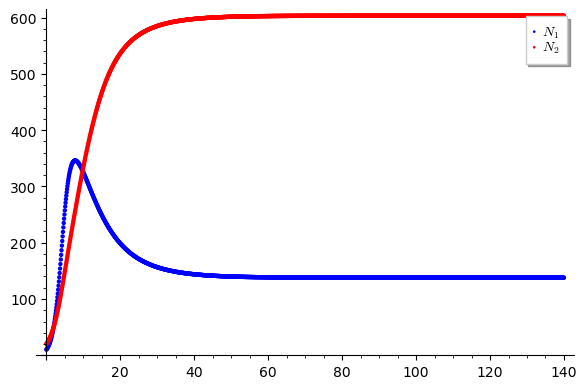

In [12]:
p1 = list_plot([ [i,j] for i,j,k in res], legend_label='$N_1$')
p2 = list_plot([ [i,k] for i,j,k in res], color='red', legend_label='$N_2$')
show(p1+p2)

In [13]:
eqs[3][0].rhs()(K_1=500,alpha=0.6, K_2=700, beta=0.7)

137.931034482759

In [14]:
eqs[3][1].rhs()(K_1=500,alpha=0.6, K_2=700, beta=0.7)

603.448275862069

Agora vamos plotar as nuliclinas do sistema no espaço de estados  juntamente com o ponto de equilíbrio e a trajetória da dinâmica simulada acima.

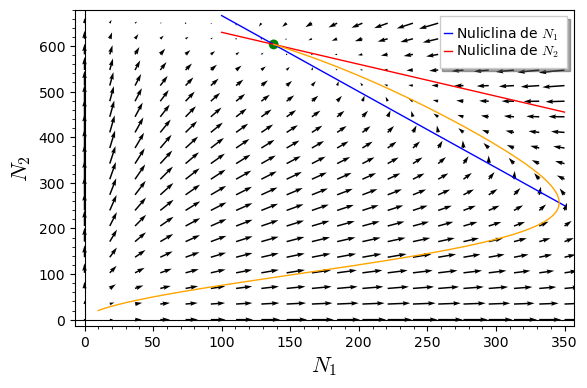

In [15]:
vf = plot_vector_field([de1(r_1=0.9,K_1=500,alpha=0.6),de2(r_2=0.5,K_2=700,beta=0.7)],(N_1,0,350),(N_2,0,650),axes_labels=[r'$N_1$',r'$N_2$'])
null1 = plot(solve(de1,N_2)[0].rhs()(K_1=500,alpha=0.6),(100,350),color='blue', legend_label='Nuliclina de $N_1$')
null2 = plot(solve(de2,N_2)[0].rhs()(K_2=700,beta=0.7),(100,350),color='red', legend_label='Nuliclina de $N_2$')
traj = list_plot([(j,k) for i,j,k in res],color="orange", plotjoined=True);
# Agora vamos plotar o ponto de equilíbrio:
pe = point((eqs[3][0].rhs()(K_1=500,alpha=0.6,K_2=700,beta=0.7),eqs[3][1].rhs()(K_1=500,alpha=0.6,K_2=700,beta=0.7)), color='green',pointsize=50)
show(vf+null1+null2+pe+traj)


## Lotka-Volterra Predador-presa

O modelo de lotka- volterra pode ser facilmente adaptado para outros tipos de interação entre populações, como a relação de predação. Abaixo vamos começar a explorar um modelo muito simples de predação sem limitações ao crescimento das populações por densidade.


In [16]:
def plot_sol(sol):
    a=list_plot([(i[0],i[1][0]) for i in sol],color='red', plotjoined=True, legend_label='x', alpha=.8)
    c=list_plot([(i[0],i[1][1]) for i in sol],color='blue', plotjoined=True, legend_label='y', alpha=.8, axes_labels=["t","y"], gridlines=True)
    a.legend()
    c.legend()
    show(c+a)

In [17]:
var('a b c d x y t')
dx = a*x -b*x*y
dy = -c*y + d*x*y
show('dx/dt=',dx)
show('dy/dt=',dy)

'dx/dt=' -b*x*y + a*x

'dy/dt=' d*x*y - c*y

In [18]:
eqs = solve([dx,dy],(x,y))
eqs

[[x == 0, y == 0], [x == c/d, y == a/b]]

In [19]:
def fun(t,y):
    x,y = y
    a=1.9;b=0.1; c=0.2;d=0.1
    return [a*x -b*x*y,
            -c*y + d*x*y]

In [35]:
T = ode_solver()
T.algorithm='rk8pd'
T.function = fun
y0=[2,15]
T.ode_solve(t_span=[0,50],y_0=y0, num_points=100)

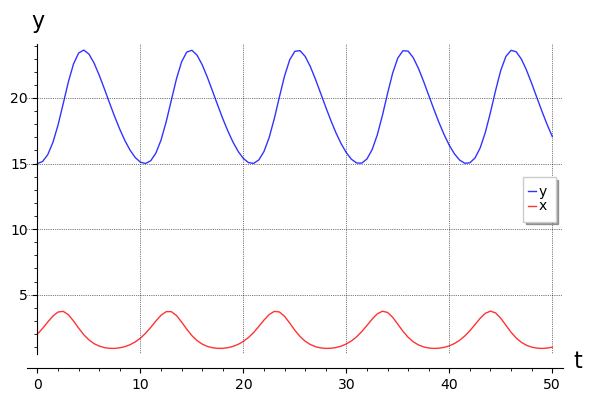

In [36]:
plot_sol(T.solution)

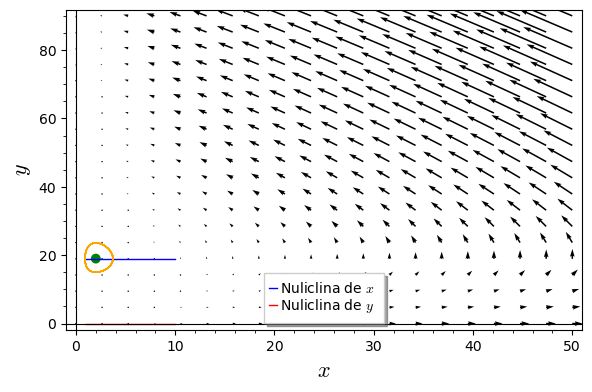

In [37]:
vf = plot_vector_field([dx(a=1.9,b=0.1, c=0.2,d=0.1),dy(a=1.9,b=0.1, c=0.2,d=0.1)],(x,0,50),(y,0,90),axes_labels=[r'$x$',r'$y$'])
null1 = plot(solve(dx,y)[0].rhs()(a=1.9,b=0.1, c=0.2,d=0.1),(1,10),color='blue', legend_label='Nuliclina de $x$')
null2 = plot(solve(dy,y)[0].rhs()(a=1.9,b=0.1, c=0.2,d=0.1),(1,10),color='red', legend_label='Nuliclina de $y$')
traj = list_plot([(i[1][0],i[1][1]) for i  in T.solution],color="orange", plotjoined=True);
# Agora vamos plotar o ponto de equilíbrio:
pe = point((eqs[1][0].rhs()(a=1.9,b=0.1, c=0.2,d=0.1),eqs[1][1].rhs()(a=1.9,b=0.1, c=0.2,d=0.1)), color='green',pointsize=50)
show(vf+null1+null2+pe+traj)

In [23]:
var('x y a b c d')
jac = jacobian([a*x -b*x*y,-c*y + d*x*y], [x,y])
jac

[-b*y + a     -b*x]
[     d*y  d*x - c]

In [24]:
jac_eq = jac.subs(x=c/d,y=a/b)
jac_eq

[     0 -b*c/d]
[ a*d/b      0]

In [26]:
evs = jac_eq.eigenvalues()
evs

[-sqrt(-a*c), sqrt(-a*c)]

In [27]:
evs[0].subs({a:1.9,c:0.2})

-3.77461493867754e-17 - 0.616441400296898*I

In [28]:
evs[1].subs({a:1.9,c:0.2})

3.77461493867754e-17 + 0.616441400296898*I